In [3]:
import numpy as np
np.set_printoptions(threshold=10000, suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

# TP2 - Sélection de variables semi-supervisée

## Dataset: Wave.txt (vagues de Brieman)
- 5000 individus
- 40 variables  
- 3 classes

## I. Découpage de la base en apprentissage/test

In [ ]:

df = pd.read_csv('C:\\Users\\hp\\OneDrive\\Documents\\POLYTECH\\2025_2026\\Big_data_tp1\\Wave.txt', sep='\s+', header=None, engine='python')
print("Loaded df shape:", df.shape)


n_cols = df.shape[1]
feature_names = [f'X{i}' for i in range(n_cols - 1)] + ['label']
df.columns = feature_names

print("\nAperçu des données:")
print(df.head())


y = df['label']
print("\nInformations sur les labels:")
print(f"  - Nombre de classes: {y.nunique()}")
print(f"  - Distribution:\n{y.value_counts().sort_index()}")

Loaded df shape: (5000, 41)

Aperçu des données:
     X0    X1    X2    X3    X4    X5    X6    X7    X8    X9  ...   X31  \
0 -0.23 -1.21  1.20  1.23 -0.10  0.12  2.49  1.19  1.34  0.58  ... -0.86   
1  0.38  0.38 -0.31 -0.09  1.52  1.35  1.49  3.81  2.33  1.34  ...  1.28   
2 -0.69  1.00  1.08  1.48  2.44  3.39  3.09  4.08  5.48  3.61  ...  0.29   
3  0.40  0.68  0.27  1.39  1.03 -0.32 -1.23 -0.50  0.11  0.87  ...  0.43   
4 -0.81  1.59 -0.69  1.16  4.22  4.98  4.52  2.54  5.60  4.66  ...  0.62   

    X32   X33   X34   X35   X36   X37   X38   X39  label  
0 -0.70  0.51  0.34 -0.13 -0.87  0.56 -0.53  0.29      2  
1  1.40  0.00 -0.18  0.71  0.04  0.91 -0.79  0.22      0  
2  1.12  0.60  0.28  2.17  0.18 -0.09 -1.33  1.00      1  
3 -0.30 -0.07 -0.99 -0.75  1.11  1.35 -1.63  0.10      0  
4  0.14  1.33 -1.87  1.48 -0.02 -0.58  0.93  0.40      1  

[5 rows x 41 columns]

Informations sur les labels:
  - Nombre de classes: 3
  - Distribution:
label
0    1692
1    1653
2    1655
Name: co

In [ ]:
def stratified_split(df, test_size=0.5, random_state=42):
    """Découpe stratifiée ET normalisation ."""
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # 1. Découpage
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    
    A = pd.DataFrame(X_train_scaled, columns=X.columns)
    A['label'] = y_train.values
    
    T = pd.DataFrame(X_test_scaled, columns=X.columns)
    T['label'] = y_test.values

    print("Données normalisées avec succès (Moyenne=0, Écart-type=1)")
    return A, T

In [6]:
A , T = stratified_split(df, test_size=0.5, random_state=42)


Données normalisées avec succès (Moyenne=0, Écart-type=1)


## II. Simulation de l'aspect semi-supervisé

In [ ]:
def semi_label(A, pct=0.1, random_state=42):
    
    np.random.seed(random_state)
    A_copy = A.copy().reset_index(drop=True)
    
   
    y_col = A_copy.columns[-1]  
    
   
    n_samples = A_copy.shape[0]
    n_labeled = int(n_samples * pct)
    
    indices = np.arange(n_samples)
    labeled_indices = np.random.choice(indices, n_labeled, replace=False)
    unlabeled_indices = np.setdiff1d(indices, labeled_indices)

    A_etiq = A_copy.iloc[labeled_indices].copy()
    A_non_etiq = A_copy.iloc[unlabeled_indices].copy()

   
    A_non_etiq[y_col] = np.nan

    
    print(f" Echantillons étiquetés: {len(A_etiq)}")
    print(f" Échantillons non étiquetés: {len(A_non_etiq)}")
    
    return A_etiq, A_non_etiq

In [8]:
semi_label(A, pct=0.1, random_state=42)

Simulation semi-supervisée prête (Données déjà normalisées).
 - Échantillons étiquetés: 250
 - Échantillons non étiquetés: 2250


(            X0        X1        X2        X3        X4        X5        X6  \
 1447 -0.523165  0.072127  0.409160 -0.011400 -0.559752 -0.528253 -0.615769   
 1114 -0.001797 -0.632920 -0.288148 -0.074549  1.431656  0.260518  0.011904   
 1064  2.073649 -0.304542 -0.500742  0.662186  0.125718  0.150966  0.536599   
 2287  0.539624 -0.410782  1.591181  0.732351  1.165741  1.153363  0.056037   
 1537 -0.773823  0.352214 -0.925929  0.171029  0.131627  0.780887 -0.203858   
 ...        ...       ...       ...       ...       ...       ...       ...   
 801   1.161255 -1.231727 -1.138523  0.002633 -1.611594 -0.851430 -0.620672   
 233   1.812965  1.124869 -0.339170 -0.299078 -1.215676 -0.665192 -0.365680   
 1514  0.459414  0.526062  0.315618 -0.488524  0.078444  0.315294 -0.713842   
 940  -1.335296 -1.328309  1.387091  0.227161 -1.050218 -0.106480 -0.713842   
 998   0.078414  0.072127 -1.130019  0.746384 -1.233404 -0.051704 -0.243088   
 
             X7        X8        X9  ...       X31

In [10]:
A_etiq, A_non_etiq = semi_label(A, pct=0.1, random_state=42)

Simulation semi-supervisée prête (Données déjà normalisées).
 - Échantillons étiquetés: 250
 - Échantillons non étiquetés: 2250


In [ ]:
def S1(x, y):
    """ le score de Fisher S₁(v)"""
    mu = x.mean()
    between_var = 0.0
    within_var = 0.0
    
    for label, group in x.groupby(y):
        n_k = len(group)
        mu_k = group.mean()
        
        sigma_k_sq = np.var(group) 
        
        between_var += n_k * (mu_k - mu) ** 2
        within_var += n_k * sigma_k_sq
 
    
    return between_var / within_var

In [ ]:
def S2(x, t=10):
    """ score Laplacien
    """
    x_arr = x.values.astype(float)
    var = np.var(x_arr)
    
    if var == 0 or np.isnan(var):
        return np.nan
    
    n = len(x_arr)
    
    diff_matrix = x_arr[:, None] - x_arr[None, :]  

    S_matrix = np.exp(-(diff_matrix ** 2) / t)
    
    numerator = np.sum((diff_matrix ** 2) * S_matrix)
    score = numerator / var
    
    return score

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform



def compute_scores(A_etiq, A_non_etiq, t=10):
   
    X_etiq = A_etiq.drop(columns=["label"])
    y = A_etiq["label"]
    X_non = A_non_etiq.drop(columns=["label"])
   
    dist_sq = squareform(pdist(X_non, 'sqeuclidean'))
    S_matrix = np.exp(-dist_sq / t)

    scores = {}
    s1_dict = {}
    s2_dict = {}
    
    print("Calcul des scores pour chaque variable...")
    for i, v in enumerate(X_etiq.columns):
        if (i + 1) % 10 == 0:
            print(f"  Progression: {i + 1}/{len(X_etiq.columns)}")
        
        # S1 (Fisher)
        s1 = S1(X_etiq[v], y)
        
        # S2 (Laplace) 
        x_v = X_non[v].values
        var_v = np.var(x_v)
        
        diff_v = (x_v[:, None] - x_v[None, :]) ** 2
        numerator = np.sum(diff_v * S_matrix)
        s2 = numerator / var_v
        
        s1_dict[v] = s1
        s2_dict[v] = s2
        
        
        if s2 > 0 and not np.isinf(s2):
            scores[v] = s1 / s2
        else:
            scores[v] = 0.0
            
    return pd.Series(scores), s1_dict, s2_dict


scores, s1_results, s2_results = compute_scores(A_etiq, A_non_etiq, t=10)
print(scores)


Calcul des scores pour chaque variable...
  Progression: 10/40
  Progression: 20/40
  Progression: 30/40
  Progression: 40/40
X0     8.263692e-07
X1     2.312172e-06
X2     1.211892e-05
X3     2.858819e-05
X4     4.283547e-05
X5     5.878744e-05
X6     5.287118e-05
X7     5.119090e-05
X8     4.741332e-05
X9     5.110489e-05
X10    3.703544e-05
X11    3.527062e-05
X12    5.908121e-05
X13    3.568905e-05
X14    4.933623e-05
X15    5.777077e-05
X16    5.933934e-05
X17    2.352506e-05
X18    1.055058e-05
X19    4.407326e-06
X20    1.224927e-07
X21    7.470444e-07
X22    1.001905e-06
X23    5.503135e-07
X24    1.580926e-06
X25    6.199008e-07
X26    1.286573e-06
X27    5.886228e-07
X28    1.697996e-07
X29    2.708188e-07
X30    2.133737e-07
X31    1.404018e-08
X32    9.206837e-07
X33    1.365125e-07
X34    9.761338e-08
X35    1.023455e-07
X36    7.252376e-07
X37    1.598254e-06
X38    2.004176e-07
X39    3.454449e-07
dtype: float64


## IV. Évaluation de la sélection



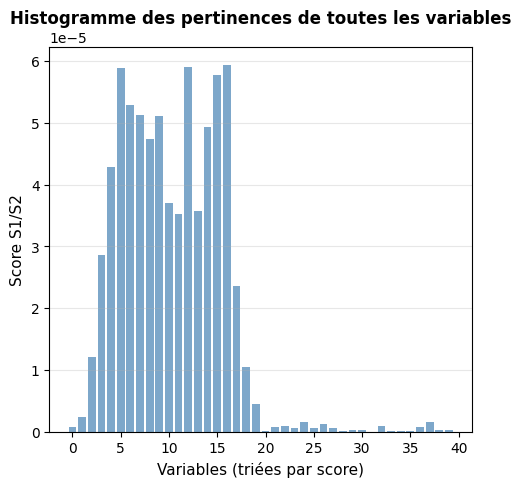

In [ ]:
# 1. Histogramme des pertinences
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scores_clean = scores.dropna()
plt.bar(range(len(scores_clean)), scores_clean.values, color='steelblue', alpha=0.7)
plt.xlabel('Variables (triées par score)', fontsize=11)
plt.ylabel('Score S1/S2', fontsize=11)
plt.title('Histogramme des pertinences de toutes les variables', fontweight='bold')
plt.grid(axis='y', alpha=0.3)


plt.show()

In [ ]:
def evaluate_mlp(A_etiq, T, selected_vars, normalize=False, verbose=True):
    
    X_train = A_etiq[selected_vars]
    y_train = A_etiq['label']
    X_test = T[selected_vars]
    y_test = T['label']
    
    
    if normalize:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    # Entraînement du MLP
    mlp = MLPClassifier(hidden_layer_sizes=(12, 10, 10), max_iter=5000, random_state=42)
    
    mlp.fit(X_train, y_train)
    
    # Prédiction
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if verbose:
        print(f"  Nombre de variables: {len(selected_vars)}")
        print(f"  Normalisation: {'Oui' if normalize else 'Non'}")
        print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    return accuracy


Test avec 5 variables:
  Sans normalisation:
  Nombre de variables: 5
  Normalisation: Non
  Accuracy: 0.4684 (46.84%)
  Avec normalisation:
  Nombre de variables: 5
  Normalisation: Oui
  Accuracy: 0.4880 (48.80%)

Test avec 10 variables:
  Sans normalisation:
  Nombre de variables: 10
  Normalisation: Non
  Accuracy: 0.7132 (71.32%)
  Avec normalisation:
  Nombre de variables: 10
  Normalisation: Oui
  Accuracy: 0.7140 (71.40%)

Test avec 15 variables:
  Sans normalisation:
  Nombre de variables: 15
  Normalisation: Non
  Accuracy: 0.7936 (79.36%)
  Avec normalisation:
  Nombre de variables: 15
  Normalisation: Oui
  Accuracy: 0.8032 (80.32%)

Test avec 20 variables:
  Sans normalisation:
  Nombre de variables: 20
  Normalisation: Non
  Accuracy: 0.8292 (82.92%)
  Avec normalisation:
  Nombre de variables: 20
  Normalisation: Oui
  Accuracy: 0.8276 (82.76%)

Test avec 25 variables:
  Sans normalisation:
  Nombre de variables: 25
  Normalisation: Non
  Accuracy: 0.7880 (78.80%)
  Ave

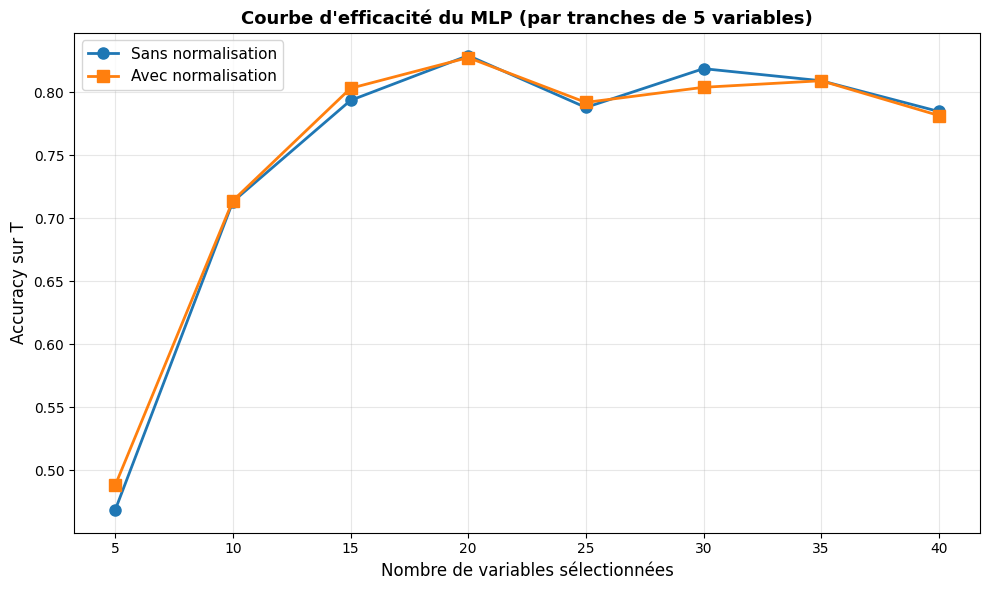

In [40]:
# 2. Courbe d'efficacité avec/sans normalisation 

n_vars_range = list(range(5, 41, 5))  
acc_no_norm = []
acc_with_norm = []

for n in n_vars_range:
    selected = scores.head(n).index.tolist()
    
    print(f"\nTest avec {n} variables:")
    print("  Sans normalisation:")
    acc_nn = evaluate_mlp(A_etiq, T, selected, normalize=False)
    acc_no_norm.append(acc_nn)
    
    print("  Avec normalisation:")
    acc_wn = evaluate_mlp(A_etiq, T, selected, normalize=True)
    acc_with_norm.append(acc_wn)

# Graphique
plt.figure(figsize=(10, 6))
plt.plot(n_vars_range, acc_no_norm, 'o-', label='Sans normalisation', linewidth=2, markersize=8)
plt.plot(n_vars_range, acc_with_norm, 's-', label='Avec normalisation', linewidth=2, markersize=8)
plt.xlabel('Nombre de variables sélectionnées', fontsize=12)
plt.ylabel('Accuracy sur T', fontsize=12)
plt.title('Courbe d\'efficacité du MLP (par tranches de 5 variables)', fontweight='bold', fontsize=13)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

ÉVALUATION: VARIABLES NON-PERTINENTES

Test avec 5 variables NON-pertinentes:
  Nombre de variables: 5
  Normalisation: Oui
  Accuracy: 0.3252 (32.52%)

Test avec 10 variables NON-pertinentes:
  Nombre de variables: 10
  Normalisation: Oui
  Accuracy: 0.3236 (32.36%)

Test avec 15 variables NON-pertinentes:
  Nombre de variables: 15
  Normalisation: Oui
  Accuracy: 0.3356 (33.56%)

Test avec 20 variables NON-pertinentes:
  Nombre de variables: 20
  Normalisation: Oui
  Accuracy: 0.3332 (33.32%)

Test avec 25 variables NON-pertinentes:
  Nombre de variables: 25
  Normalisation: Oui
  Accuracy: 0.4248 (42.48%)

Test avec 30 variables NON-pertinentes:
  Nombre de variables: 30
  Normalisation: Oui
  Accuracy: 0.6468 (64.68%)

Test avec 35 variables NON-pertinentes:
  Nombre de variables: 35
  Normalisation: Oui
  Accuracy: 0.7460 (74.60%)

Test avec 40 variables NON-pertinentes:
  Nombre de variables: 40
  Normalisation: Oui
  Accuracy: 0.7644 (76.44%)


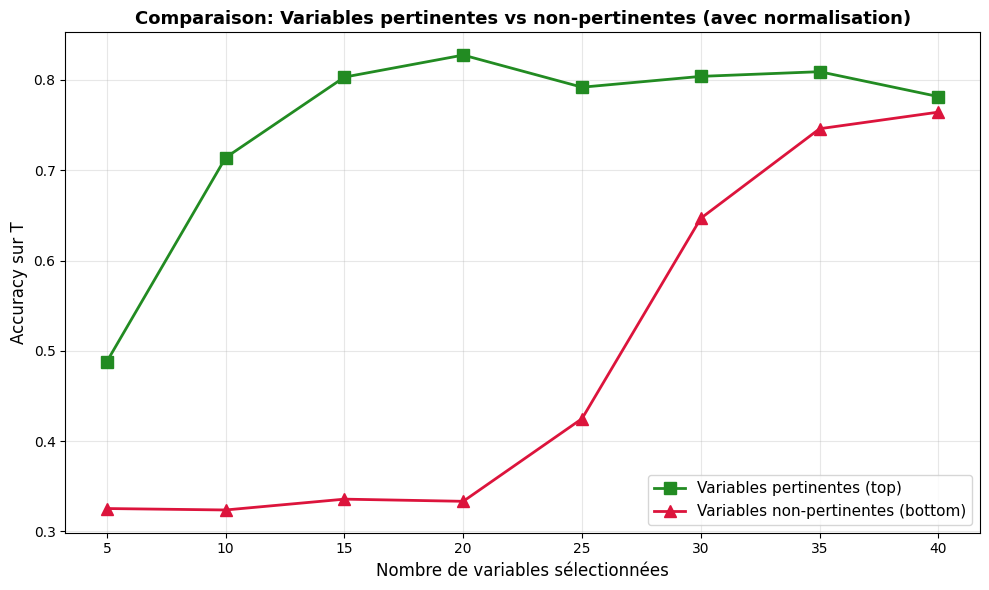

In [ ]:
# 3. Courbe sur variables non-pertinentes 

print("ÉVALUATION: VARIABLES NON-PERTINENTES")

scores_reversed = scores.sort_values(ascending=True)

acc_non_pertinent = []
for n in n_vars_range:
    selected = scores_reversed.head(n).index.tolist()
    
    print(f"\nTest avec {n} variables NON-pertinentes:")
    acc = evaluate_mlp(A_etiq, T, selected, normalize=True)
    acc_non_pertinent.append(acc)


plt.figure(figsize=(10, 6))
plt.plot(n_vars_range, acc_with_norm, 's-', label='Variables pertinentes (top)', 
         linewidth=2, markersize=8, color='forestgreen')
plt.plot(n_vars_range, acc_non_pertinent, '^-', label='Variables non-pertinentes (bottom)', 
         linewidth=2, markersize=8, color='crimson')
plt.xlabel('Nombre de variables sélectionnées', fontsize=12)
plt.ylabel('Accuracy sur T', fontsize=12)
plt.title('Comparaison: Variables pertinentes vs non-pertinentes (avec normalisation)', 
          fontweight='bold', fontsize=13)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

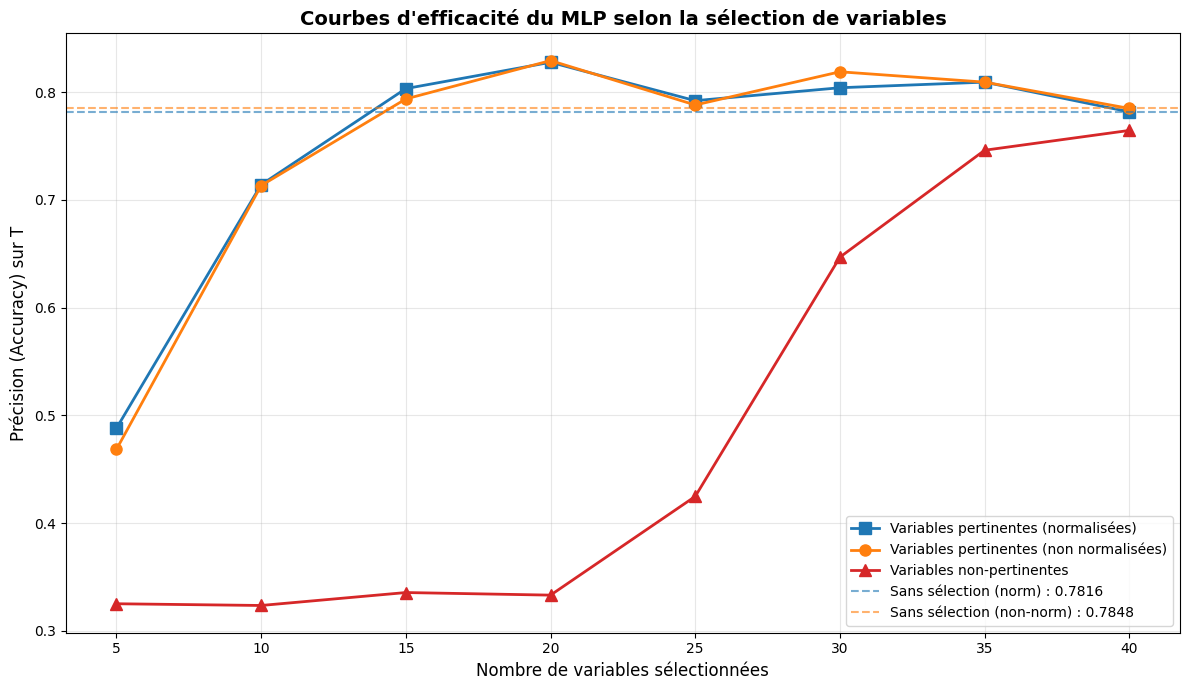

In [ ]:

all_features = scores.index.tolist()

# Courbe "Sans sélection" 
acc_full_norm = evaluate_mlp(A_etiq, T, all_features, normalize=True, verbose=False)
acc_full_no_norm = evaluate_mlp(A_etiq, T, all_features, normalize=False, verbose=False)


plt.figure(figsize=(12, 7))

# 1. Variables pertinentes (Normalisées)
plt.plot(n_vars_range, acc_with_norm, 's-', label='Variables pertinentes (normalisées)', 
         color='tab:blue', linewidth=2, markersize=8)

# 2. Variables pertinentes (Non normalisées)
plt.plot(n_vars_range, acc_no_norm, 'o-', label='Variables pertinentes (non normalisées)', 
         color='tab:orange', linewidth=2, markersize=8)

# 3. Variables NON-pertinentes (Normalisées)
plt.plot(n_vars_range, acc_non_pertinent, '^-', label='Variables non-pertinentes', 
         color='tab:red', linewidth=2, markersize=8)

# 4. Sans sélection de variables (Normalisées) 
plt.axhline(y=acc_full_norm, color='tab:blue', linestyle='--', alpha=0.6, 
            label=f'Sans sélection (norm) : {acc_full_norm:.4f}')

# 5. Sans sélection de variables (Non normalisées)
plt.axhline(y=acc_full_no_norm, color='tab:orange', linestyle='--', alpha=0.6, 
            label=f'Sans sélection (non-norm) : {acc_full_no_norm:.4f}')

plt.title("Courbes d'efficacité du MLP selon la sélection de variables", fontweight='bold', fontsize=14)
plt.xlabel("Nombre de variables sélectionnées", fontsize=12)
plt.ylabel("Précision (Accuracy) sur T", fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='-', alpha=0.3)
plt.xticks(n_vars_range)

plt.tight_layout()
plt.show()

ÉVALUATION: IMPACT DU NOMBRE DE VARIABLES
  10 variables: accuracy = 0.7140
  20 variables: accuracy = 0.8276
  30 variables: accuracy = 0.8040
  40 variables: accuracy = 0.7816


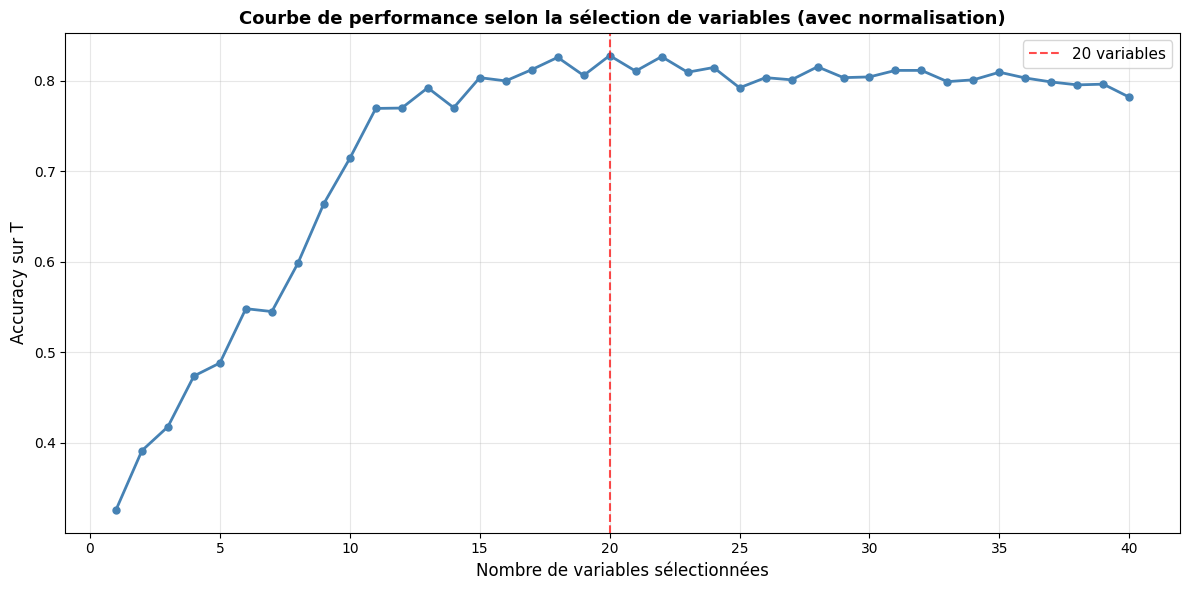


 Meilleur nombre de variables: 20 (accuracy = 0.8276)


In [ ]:
# 4. Courbe selon la sélection de variables (normalisation activée)

print("ÉVALUATION: IMPACT DU NOMBRE DE VARIABLES")


n_vars_detailed = list(range(1, 41))
acc_detailed = []

for n in n_vars_detailed:
    selected = scores.head(n).index.tolist()
    acc = evaluate_mlp(A_etiq, T, selected, normalize=True, verbose=False)
    acc_detailed.append(acc)
    
    if n % 10 == 0:
        print(f"  {n} variables: accuracy = {acc:.4f}")

# Graphique
plt.figure(figsize=(12, 6))
plt.plot(n_vars_detailed, acc_detailed, 'o-', linewidth=2, markersize=5, color='steelblue')
plt.axvline(x=20, color='red', linestyle='--', alpha=0.7, label='20 variables')
plt.xlabel('Nombre de variables sélectionnées', fontsize=12)
plt.ylabel('Accuracy sur T', fontsize=12)
plt.title('Courbe de performance selon la sélection de variables (avec normalisation)', 
          fontweight='bold', fontsize=13)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Trouver le meilleur nombre de variables
best_n = n_vars_detailed[np.argmax(acc_detailed)]
best_acc = max(acc_detailed)
print(f"\n Meilleur nombre de variables: {best_n} (accuracy = {best_acc:.4f})")

ÉVALUATION: IMPACT DU % DE DONNÉES LABELLISÉES

Test avec 5% de données labellisées:
Simulation semi-supervisée prête (Données déjà normalisées).
 - Échantillons étiquetés: 125
 - Échantillons non étiquetés: 2375
Calcul des scores pour chaque variable...
  Progression: 10/40
  Progression: 20/40
  Progression: 30/40
  Progression: 40/40
  Nombre de variables: 20
  Normalisation: Oui
  Accuracy: 0.8052 (80.52%)

Test avec 10% de données labellisées:
Simulation semi-supervisée prête (Données déjà normalisées).
 - Échantillons étiquetés: 250
 - Échantillons non étiquetés: 2250
Calcul des scores pour chaque variable...
  Progression: 10/40
  Progression: 20/40
  Progression: 30/40
  Progression: 40/40
  Nombre de variables: 20
  Normalisation: Oui
  Accuracy: 0.8276 (82.76%)

Test avec 15% de données labellisées:
Simulation semi-supervisée prête (Données déjà normalisées).
 - Échantillons étiquetés: 375
 - Échantillons non étiquetés: 2125
Calcul des scores pour chaque variable...
  Progres

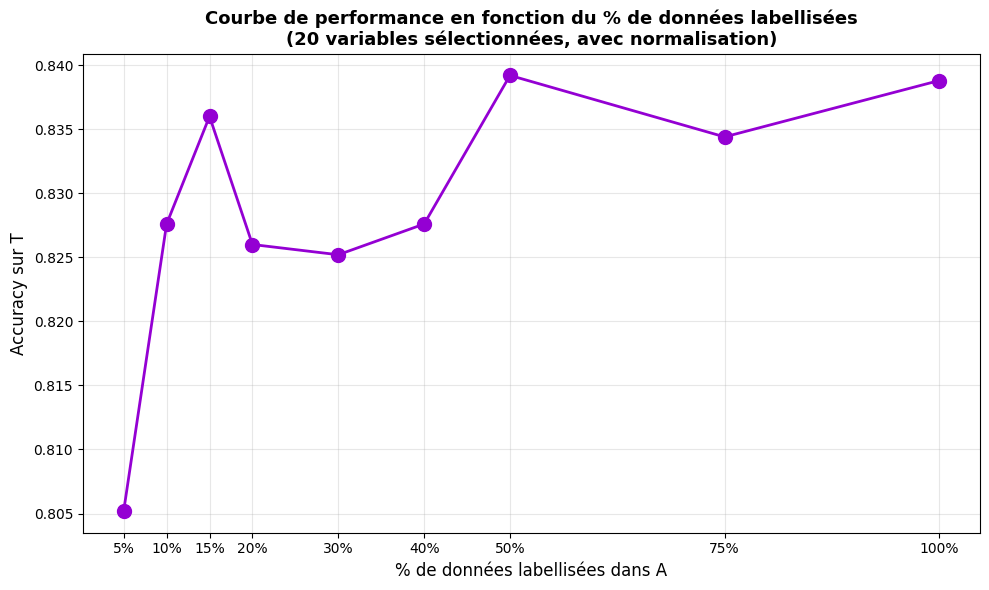


Meilleur % de labellisation: 50% (accuracy = 0.8392)


In [45]:
# 5. Impact du % de données labellisées (fixé à 20 variables)

print("ÉVALUATION: IMPACT DU % DE DONNÉES LABELLISÉES")


pct_range = [0.05, 0.10, 0.15, 0.20, 0.30, 0.40, 0.50, 0.75, 1.0]
acc_by_pct = []

for pct in pct_range:
    print(f"\nTest avec {pct*100:.0f}% de données labellisées:")
    
    A_etiq_temp, A_non_etiq_temp = semi_label(A, pct=pct, random_state=42)
    
    scores_temp, _, _ = compute_scores(A_etiq_temp, A_non_etiq_temp, t=10)
    
    selected_20 = scores_temp.head(20).index.tolist()
     
    acc = evaluate_mlp(A_etiq_temp, T, selected_20, normalize=True)
    acc_by_pct.append(acc)

# Graphique
plt.figure(figsize=(10, 6))
pct_labels = [f"{p*100:.0f}%" for p in pct_range]
plt.plot(pct_range, acc_by_pct, 'o-', linewidth=2, markersize=10, color='darkviolet')
plt.xlabel('% de données labellisées dans A', fontsize=12)
plt.ylabel('Accuracy sur T', fontsize=12)
plt.title('Courbe de performance en fonction du % de données labellisées\n(20 variables sélectionnées, avec normalisation)', 
          fontweight='bold', fontsize=13)
plt.xticks(pct_range, pct_labels)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nMeilleur % de labellisation: {pct_range[np.argmax(acc_by_pct)]*100:.0f}% "
      f"(accuracy = {max(acc_by_pct):.4f})")